# Heart disease patient Data Analysis

## Import Libraries and Load Data

In [1]:
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset visualization

here we calculate the size and class balance of the dataset and check for missing values

In [2]:
# Load the CSV file into a Pandas DataFrame
df = pd.read_csv('Heart_Disease_Dataset.csv')

# i. The size of the data
data_size = len(df)
print("i. Size of the data:", data_size)

# ii. Check for missing values
missing_values = df.isnull().sum().get(0)
if missing_values != 0:
    print(f"ii. The data has {missing_values} missing values.")
else:
    print("ii. The data does not have missing values.")

# iii. Check class balance
class_balance = df['target'].value_counts(normalize=True)
print("iii. Class balance:")
print(class_balance)


i. Size of the data: 1190
ii. The data does not have missing values.
iii. Class balance:
1    0.528571
0    0.471429
Name: target, dtype: float64


## Age and Sex Distribution Visualization

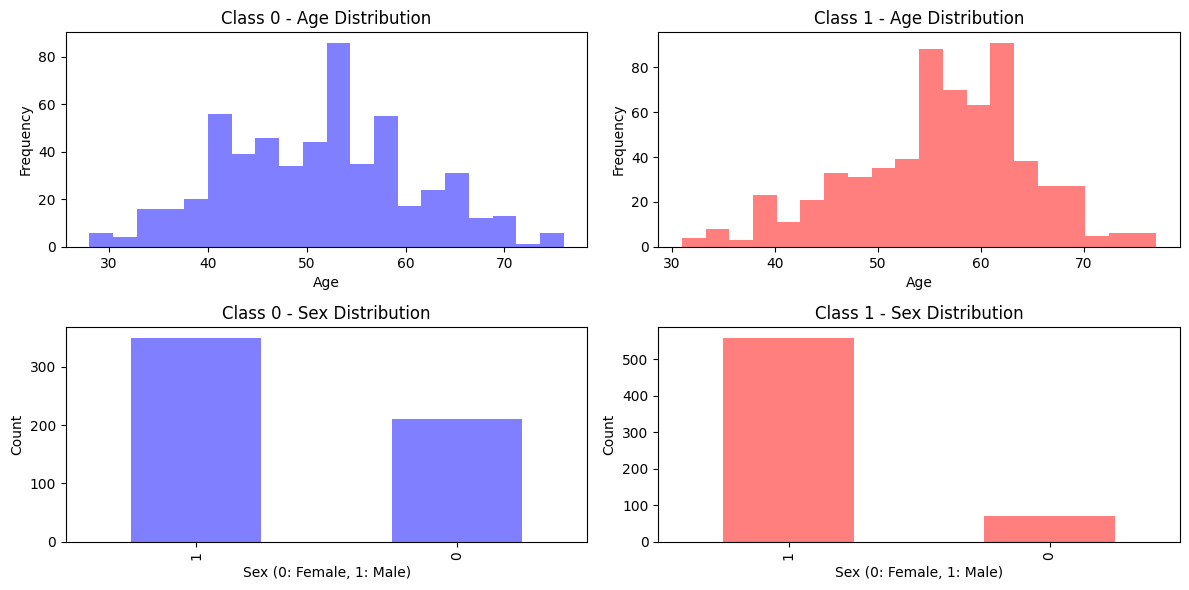

In [3]:
# iv. Plot age and sex distribution for each class
plt.figure(figsize=(12, 6))

# Plot age distribution for class 0
plt.subplot(2, 2, 1)
plt.hist(df[df['target'] == 0]['age'], bins=20, color='blue', alpha=0.5)
plt.title("Class 0 - Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Plot age distribution for class 1
plt.subplot(2, 2, 2)
plt.hist(df[df['target'] == 1]['age'], bins=20, color='red', alpha=0.5)
plt.title("Class 1 - Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")

# Plot sex distribution for class 0
plt.subplot(2, 2, 3)
df[df['target'] == 0]['sex'].value_counts().plot(kind='bar', color='blue', alpha=0.5)
plt.title("Class 0 - Sex Distribution")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")

# Plot sex distribution for class 1
plt.subplot(2, 2, 4)
df[df['target'] == 1]['sex'].value_counts().plot(kind='bar', color='red', alpha=0.5)
plt.title("Class 1 - Sex Distribution")
plt.xlabel("Sex (0: Female, 1: Male)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

This part creates subplots to visualize the age and sex distribution for each class in the dataset (class 0 and class 1) using histograms and bar plots.

# Data Cleaning and Preprocessing

## Outlier Detection and Removal

In [4]:
# Define the threshold for outliers
threshold = 3

# select columns with numerical data that may have outliers
columns = ["age", "resting bp s", "cholesterol", "max heart rate", "oldpeak"]

# Calculate Z-scores for all columns in the DataFrame
z_scores = np.abs(stats.zscore(df[columns], nan_policy='omit'))

# Find the indices of outliers
outlier_indices = np.where(z_scores > threshold)

# Identify rows with at least one outlier in any column
outlier_rows = set(outlier_indices[0])

# Remove rows with outliers from the DataFrame
df_cleaned = df.drop(index=outlier_rows)

# Report which rows were outliers (their indices)
print("Outlier Row Indices:")
print(", ".join(map(str, list(outlier_rows))) if list(outlier_rows) else "No outliers found")

# Report the final size of the data after removing outliers
print("Final Size of the Data after Removing Outliers:", len(df_cleaned))

# change the data frame
df = df_cleaned

z_scores.head()

Outlier Row Indices:
773, 391, 1039, 400, 1172, 149, 793, 30, 167, 1070, 1075, 1078, 704, 450, 325, 76, 593, 978, 852, 734, 618, 109, 366, 242, 371, 1010, 1013, 761
Final Size of the Data after Removing Outliers: 1162


,age,resting bp s,cholesterol,max heart rate,oldpeak
0,1.466728,0.427328,0.775674,1.265039,0.849792
1,0.504600,1.516587,0.299512,0.637758,0.071119
2,1.787437,0.117301,0.716489,1.636136,0.849792
3,0.611503,0.318402,0.035867,1.244085,0.531575
4,0.029915,0.971958,0.151550,0.695214,0.849792


This section deals with outliers in the dataset by setting a threshold for detecting outliers and removing rows with outliers from specific columns.

In [5]:
from sklearn.preprocessing import MinMaxScaler

# Select only the numeric columns for normalization
numeric_columns = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
    
# Normalize the selected numeric columns
scaler = MinMaxScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,0.244898,1,2,0.571429,0.588595,0,0,0.777778,0,0.333333,1,0
1,0.428571,0,3,0.761905,0.366599,0,0,0.659259,0,0.500000,2,1
2,0.183673,1,2,0.476190,0.576375,0,1,0.229630,0,0.333333,1,0
3,0.408163,0,4,0.552381,0.435845,0,0,0.303704,1,0.583333,2,1
4,0.530612,1,3,0.666667,0.397149,0,0,0.407407,0,0.333333,1,0


In [6]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df.drop('target', axis=1)
y = df['target']

# Split the data into a 70% training set and a 30% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define an array of SVM classifiers with different kernel types
kernels = [
    SVC(kernel='linear'),
    SVC(kernel='rbf', gamma=5),
    SVC(kernel='poly', degree=10, gamma='auto')
]

# Initialize a dictionary to store evaluation metrics for each kernel
evaluation_results = {}

# Train SVM classifiers with different kernel types
for classifier in kernels:
    kernel_name = classifier.kernel
    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)
    
    
    evaluation_results[kernel_name] = {
        'Accuracy': accuracy_score(y_test, predictions),
        'Precision': precision_score(y_test, predictions),
        'Recall': recall_score(y_test, predictions),
        'F1 Score': f1_score(y_test, predictions)
    }

Kernel Type: Linear
Accuracy: 0.8197
Precision: 0.7984
Recall: 0.8655
F1 Score: 0.8306

Kernel Type: Rbf
Accuracy: 0.8627
Precision: 0.8042
Recall: 0.9664
F1 Score: 0.8779

Kernel Type: Poly
Accuracy: 0.8627
Precision: 0.8595
Recall: 0.8739
F1 Score: 0.8667



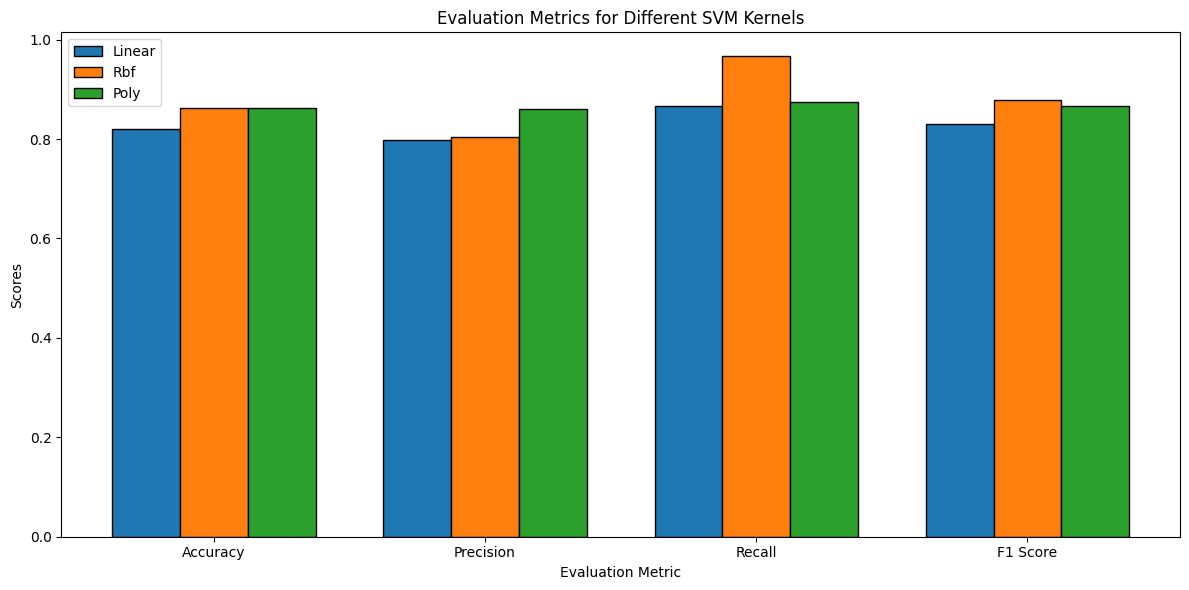

In [8]:
# Print the evaluation metrics for different kernels
for kernel, metrics in evaluation_results.items():
    print(f"Kernel Type: {kernel.capitalize()}")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")
    print()

# Create a single plot for evaluation metrics with grouped bars for different kernels
metrics = list(evaluation_results[list(evaluation_results.keys())[0]].keys())
width = 0.25
x = np.arange(len(metrics))

fig, ax = plt.subplots(figsize=(12, 6))

for i, kernel in enumerate(kernels):
    values = [evaluation_results[kernel.kernel][metric] for metric in metrics]
    ax.bar(x + i * width, values, width, label=kernel.kernel.capitalize(), edgecolor="black")

ax.set_xlabel('Evaluation Metric')
ax.set_ylabel('Scores')
ax.set_title('Evaluation Metrics for Different SVM Kernels')
ax.set_xticks(x + width * (len(kernels) - 1) / 2)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()